# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.options.mode.chained_assignment = None
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study = pd.merge(study_results,mouse_metadata,on = "Mouse ID")

# Display the data table for preview
mice_study.head()
#prep for Summary Statistics
#mice_study['Tumor Volume (mm3)'] = pd.to_numeric(['Tumor Volume (mm3)'])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [19]:
# Checking the number of mice.
mice_study['Mouse ID'].nunique()

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mice_study[mice_study.duplicated(['Mouse ID','Timepoint'])]
duplicated_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_id = mice_study.loc[mice_study['Mouse ID'] == 'g989']
duplicated_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.\
dupe_mice_id = mice_study.loc[mice_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
cleaned_mice_study = mice_study[mice_study['Mouse ID'].isin(dupe_mice_id)==False]
#cleaned_mice_study = mice_study.drop_duplicates()
cleaned_mice_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# Checking the number of mice in the clean DataFrame.
#cleaned_mice_study['Mouse ID'].nunique()
print(len(cleaned_mice_study.groupby('Mouse ID').count()))

248


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
cleaned_mice_study['Tumor Volume (mm3)'] = pd.to_numeric(cleaned_mice_study['Tumor Volume (mm3)'])
tumor_mean = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_stdev = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
results_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                           'Median Tumor Volume' : tumor_median,
                           'Tumor Volume Variance' : tumor_variance,
                           'Tumor Volume Std. Dev.' : tumor_stdev,
                           'Tumor Volume Std. Err. ' : tumor_sem,})
results_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_df = cleaned_mice_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Regimen for Mice'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Time Points'>

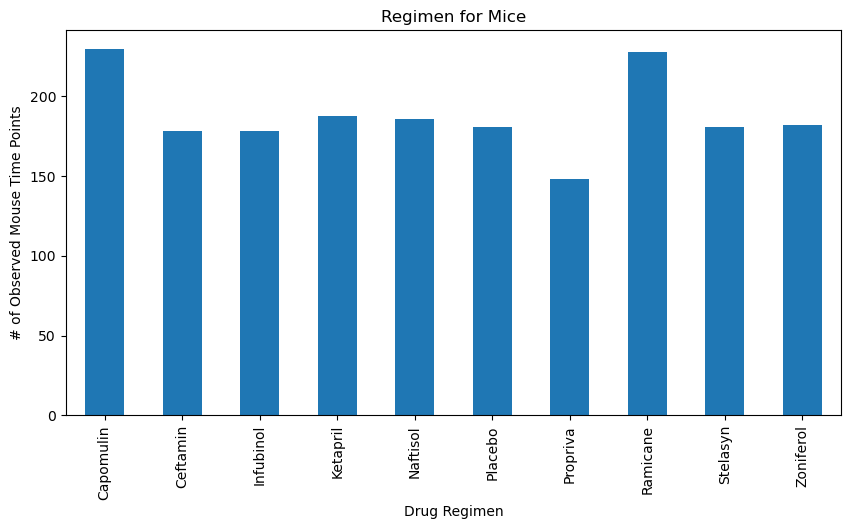

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_mice_study = cleaned_mice_study.groupby(['Drug Regimen']).count()['Mouse ID']
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.title('Drug Regimen on Number of Mice')

bar_mice_study.plot.bar(title = 'Regimen for Mice', figsize = (10,5))

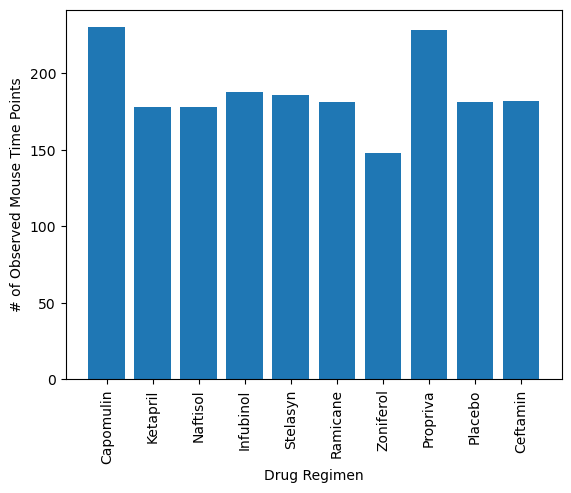

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = cleaned_mice_study.groupby(['Drug Regimen']).count()['Mouse ID']
x_axis = cleaned_mice_study['Drug Regimen'].unique()
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.bar(x_axis,y_axis)
plt.xticks(tick_locations, rotation = 90)
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Male')

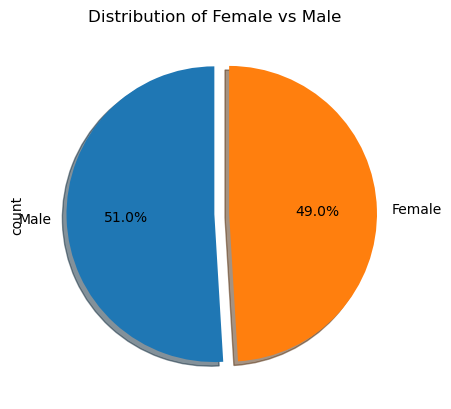

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_mice_study['Sex'].value_counts()
print(mice_gender)

mice_gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, shadow = True, explode=(0,0.1))
plt.title('Distribution of Female vs Male')

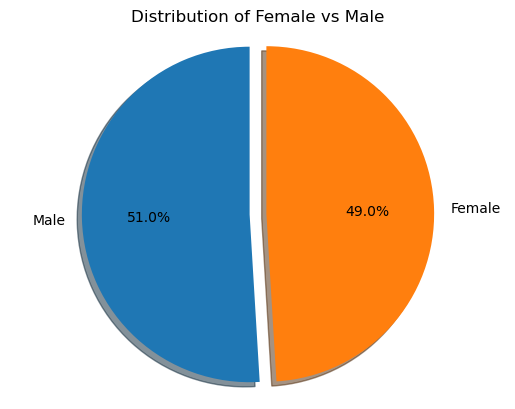

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [958,922]
explode = (0,0.1)

plt.pie(sizes, explode=explode, labels = labels,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Distribution of Female vs Male')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time_df = cleaned_mice_study.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_clean_df = final_time_df.merge(cleaned_mice_study,on=['Mouse ID','Timepoint'], how = 'left')

max_clean_df.head()
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_name = ['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}

#Calculate Final Tumor Volume
for name in treatment_name:
    for i in max_clean_df.index:
        if max_clean_df.iloc[i]['Drug Regimen']==name:
            tumor_vol_data[name].append(max_clean_df.iloc[i]['Tumor Volume (mm3)'])

tumor_df = pd.DataFrame(tumor_vol_data)
#print(tumor_df)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_name:
    # add subset 
    subset = max_clean_df.loc[max_clean_df['Drug Regimen']==name,"Tumor Volume (mm3)"]
    #print(subset)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset.quantile([0.25,0.5,0.75])
    first_quart = quartiles[0.25]
    second_quart = quartiles[0.5]
    third_quart = quartiles[0.75]
    iqr = third_quart - first_quart
    lower_bound = first_quart - (1.5*iqr)
    upper_bound = third_quart + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    #outliers = tumor_df.loc[(tumor_df[name] < lower_bound) | (tumor_df[name] > upper_bound)]
    #outliers = subset.loc[(subset > upper_bound) | (subset < lower_bound)]
    #outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
    #outliers = max_clean_df.loc[(max_clean_df['Tumor Volume (mm3)'] > upper_bound) | (max_clean_df['Tumor Volume (mm3)'] < lower_bound)]
    
#outliers = subset.loc[(subset['Tumor Volume (mm3)'] > upper_bound) | (subset['Tumor Volume (mm3)'] < lower_bound)]
outliers = max_clean_df.loc[(max_clean_df['Tumor Volume (mm3)'] >= upper_bound) | (max_clean_df['Tumor Volume (mm3)'] <= lower_bound)]
#outliers = cleaned_mice_study.loc[(cleaned_mice_study['Tumor Volume (mm3)'] >= upper_bound) | (cleaned_mice_study['Tumor Volume (mm3)'] <= lower_bound)]
outliers


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
96,k403,45,22.050126,1,Ramicane,Male,21,16
174,s185,45,23.343598,1,Capomulin,Female,3,17


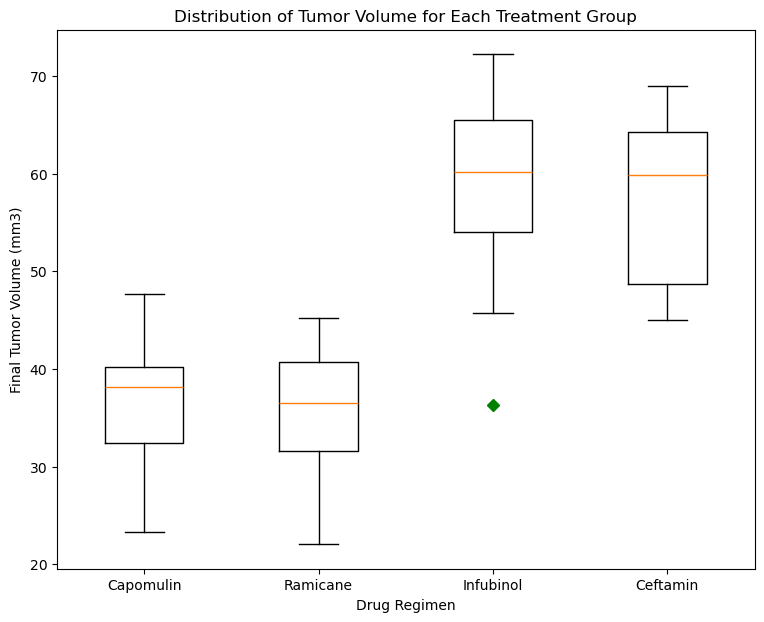

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_df,0,'gD')
plt.xticks([1,2,3,4],treatment_name)

plt.show()

## Line and Scatter Plots

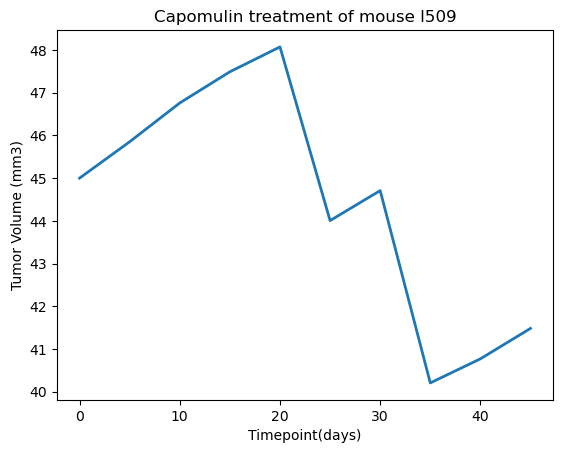

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_mouse = cleaned_mice_study[cleaned_mice_study['Mouse ID']=='l509']
x_axis = line_mouse['Timepoint']
y_axis = line_mouse['Tumor Volume (mm3)']

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(x_axis,y_axis,linewidth = 2, markersize = 12)
plt.show()

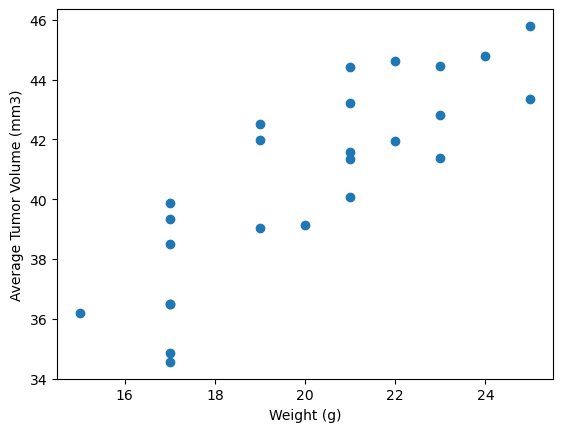

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_plot = cleaned_mice_study.loc[cleaned_mice_study['Drug Regimen']=='Capomulin',:]
capo_plot['Tumor Volume (mm3)'] = pd.to_numeric(capo_plot['Tumor Volume (mm3)'])
avg_capo_tumor_vol = capo_plot.groupby(['Mouse ID']).mean(numeric_only=True)
plt.scatter(avg_capo_tumor_vol['Weight (g)'],avg_capo_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


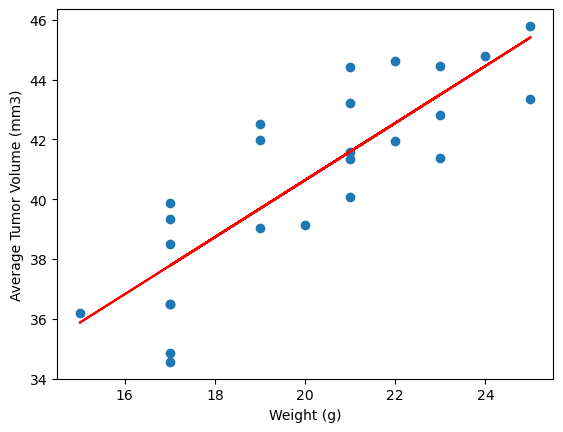

In [35]:
# Calculate the correlation coefficient and a linear regression model 
corr=round(st.pearsonr(avg_capo_tumor_vol['Weight (g)'],avg_capo_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_slope, m_int, m_rvalue, m_pvalue, m_std = st.linregress(avg_capo_tumor_vol['Weight (g)'],avg_capo_tumor_vol['Tumor Volume (mm3)'])

line = m_slope*avg_capo_tumor_vol['Weight (g)'] + m_int
plt.scatter(avg_capo_tumor_vol['Weight (g)'],avg_capo_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_capo_tumor_vol['Weight (g)'],line,'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()